# In this notebook we will use the digits dataset to demonstrate how to use the scikit-learn library to build a classifier. We will use the digits dataset, which consists of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. The task is to learn to recognize which digit is written.

In [79]:
# import data and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


# load data
digits = load_digits()

# print the data
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [80]:
# split data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

# print the shape of the data
print(X_train.shape)

(1437, 64)


In [81]:
# train the models
models = {"KNN": KNeighborsClassifier(),
          "SVM": SVC(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Naive Bayes": GaussianNB(),
          "Gradient Boosting": GradientBoostingClassifier(),
          "Extra Trees": ExtraTreesClassifier()}
# create a function to train the models
def train_models(X_train, y_train):
    for name, model in models.items():
        model.fit(X_train, y_train)

# print accuracy scores for all models
train_models(X_train, y_train)
for name, model in models.items():
    print(name, ":", model.score(X_test, y_test))

KNN : 0.975
SVM : 0.9916666666666667
Decision Tree : 0.8527777777777777
Random Forest : 0.9777777777777777
Naive Bayes : 0.825
Gradient Boosting : 0.9583333333333334
Extra Trees : 0.9777777777777777


c:\Users\radek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


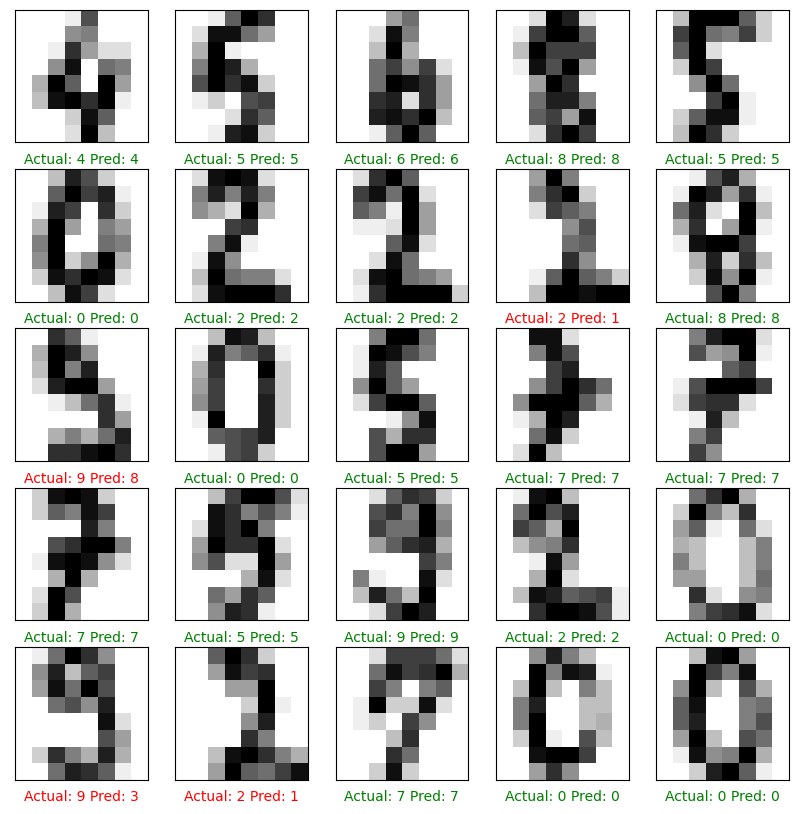

In [82]:
# show some wrong predictions with images from the dataset with their labels and predictions
def show_predictions(X_test, y_test, model):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 10))
    # Show 25 random images
    for i in range(25):
        j = rd.randint(0, len(X_test)-1)
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_test[j].reshape(8, 8), cmap=plt.cm.binary)
        if y_pred[j] == y_test[j]:
            color = "green"
        else:
            color = "red"
        plt.xlabel("Actual: " + str(y_test[j]) + " Pred: " + str(y_pred[j]), color=color)
    plt.show()

show_predictions(X_test, y_test, models["Naive Bayes"])


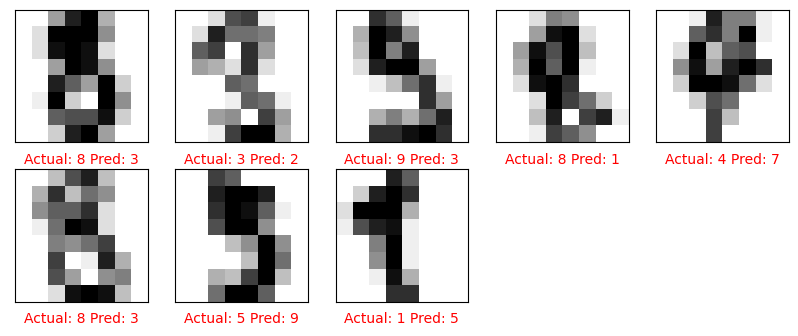

In [83]:
# show 25 wrong predictions with images from the dataset with their labels and predictions
def show_wrong_predictions(X_test, y_test, model):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 10))
    wrong = []
    # Show 25 random images
    for j in range(len(X_test)):
        if y_pred[j] != y_test[j]:
            wrong.append(j)

    im_to_show = rd.sample(wrong, min(25, len(wrong)))
    i = 0
    for im in im_to_show:
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_test[im].reshape(8, 8), cmap=plt.cm.binary)
        if y_pred[im] == y_test[im]:
            color = "green"
        else:
            color = "red"
        plt.xlabel("Actual: " + str(y_test[im]) + " Pred: " + str(y_pred[im]), color=color)
        i += 1

    plt.show()

show_wrong_predictions(X_test, y_test, models["Extra Trees"])